In [9]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
def flux(x, k, p1, p2):
    """An example of a piece-wise function."""
    nu_0 = 1e5 # recompute break
    _x = x / nu_0
    value = np.where(x <= nu_0, _x**(-p1), _x**(-p2))
    return k * value

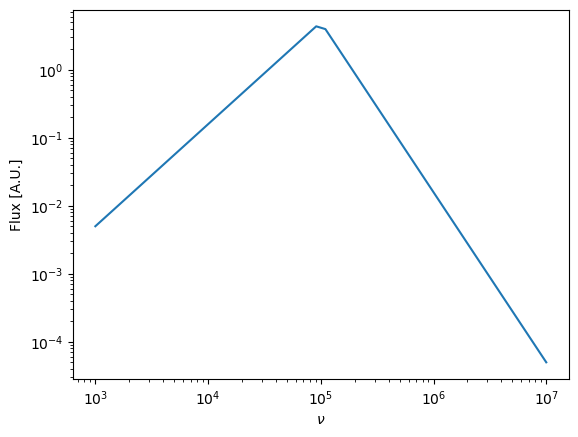

In [3]:
# let us just plot the function
nu = np.logspace(3, 7)
k = 5
p1 = -1.5
p2 = 2.5
plt.loglog(nu, flux(nu, k, p1, p2))
plt.xlabel(r"$\nu$")
plt.ylabel("Flux [A.U.]")
plt.show()

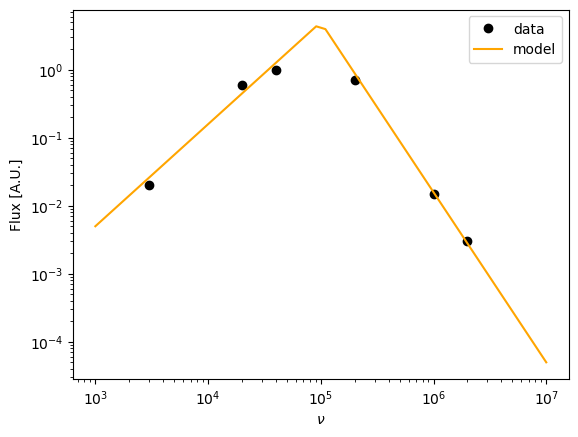

In [4]:
data_x = np.asarray([3e3, 2e4, 4e4, 2e5, 1e6, 2e6])
data_y = np.asarray([2e-2, 0.6, 1, 0.7, 0.015, 3e-3])

plt.plot(data_x, data_y, ls="", marker="o", color="k", label="data")
plt.loglog(nu, flux(nu, k, p1, p2), color="orange", label="model")
plt.xlabel(r"$\nu$")
plt.ylabel("Flux [A.U.]")
plt.legend()
plt.show()

In [14]:
popt, pcov = curve_fit(flux, data_x, data_y)
print(popt)
print(pcov)

[ 2.37242002 -0.91544704  1.77220405]
[[ 0.14113173 -0.04969955  0.08337156]
 [-0.04969955  0.01944974 -0.0293593 ]
 [ 0.08337156 -0.0293593   0.06345463]]


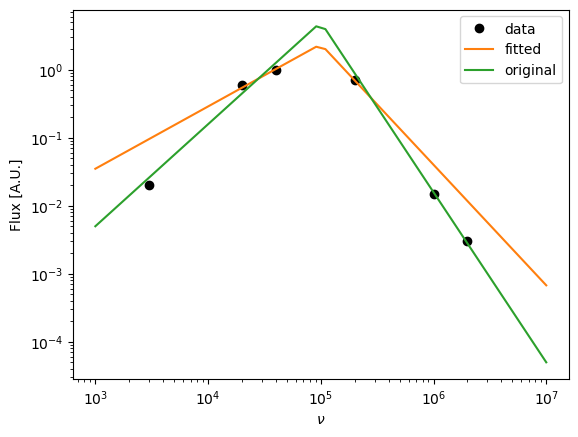

In [16]:
plt.plot(data_x, data_y, ls="", marker="o", color="k", label="data")
plt.loglog(nu, flux(nu, popt[0], popt[1], popt[2]), color="C1", label="fitted")
plt.loglog(nu, flux(nu, k, p1, p2), color="C2", label="original")
plt.xlabel(r"$\nu$")
plt.ylabel("Flux [A.U.]")
plt.legend()
plt.show()